# Project: Wrangling and Analyze Data

In [1]:
import pandas as pd
import numpy as np
import requests
import io
import tweepy
import time
import json
import matplotlib.pyplot as plt

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
# csv used manual download to notebook env, load csv into df
df_dogs = pd.read_csv('twitter-archive-enhanced.csv')
# verify accessibility using .head() / output minimized
df_dogs.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


Piece number one of the required three datasets will be called 'df_dogs' dataframe.

## Df_images - gathered from given link by assignment

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
# file now downloaded onto env, please skip cell
# url
url_images = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
# requests file setup
request_images = requests.get(url_images)
with open('image-predictions.tsv', 'wb') as file_images:
    file_images.write(request_images.content)

In [3]:
# read into df
df_images = pd.read_csv('image-predictions.tsv', sep = '\t')
# verify accessibility using .head() / output minimized
df_images.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


Piece two of the required three pieces will be called 'df_images' dataframe.

## Df_images - downloaded from tweepy API

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [5]:
# API Request completed - Please Skip Cell
# MUST DELETE - set to blank before submission for security/privacy
consumer_key =  # MUST DELETE
consumer_secret =  # MUST DELETE
access_token =  # MUST DELETE
access_secret =  # MUST DELETE
# MUST DELETE - set to blank before submission for security/privacy

In [6]:
# API Request completed - Please Skip Cell
# API settings
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
# project req include wait parameters to allow for full query to execute
# settings included in "Twitter's Rate Limit" section in "Additional Resource: Twitter API"
api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

In [7]:
# API Request completed - Please Skip Cell
# tweepy api test print / output minimized
# used ._json property courtesy of:
# https://stackoverflow.com/questions/27900451/convert-tweepy-status-object-into-json
test_tweepy = df_dogs['tweet_id'][0]
api.get_status(test_tweepy, tweet_mode= 'extended')._json

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017',
 'id': 892420643555336193,
 'id_str': '892420643555336193',
 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
 'truncated': False,
 'display_text_range': [0, 85],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 892420639486877696,
    'id_str': '892420639486877696',
    'indices': [86, 109],
    'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'url': 'https://t.co/MgUWQ76dJU',
    'display_url': 'pic.twitter.com/MgUWQ76dJU',
    'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
    'type': 'photo',
    'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'medium': {'w': 540, 'h': 528, 'resize': 'fit'},
     'small': {'w': 540, 'h': 528, 'resize': 'fit'},
     'large': {'w': 

Using knowledge of how Twitter generally works and the Tweepy API documentation, key identifiers may uncover more insight to the viral state of We Rate Dogs tweets. These categories will be added to the list of requested items for download into the API request dataframe.

- 'favorite_count' - required by project
- 'retweet_count' - required by project
- 'possibly_sensitive'  
While a wholesome group of loveable dogs may not warrant a warning for viewing, are there any?
- 'favorited'  
Did the account like any of its own tweets that led to a more viral response?
- 'is_quote_status'  
Did the account quote anyone notable that would led to a more viral response?
- 'display_text_range'  
Did the account use shorter or longer copy that led to a more viral response?

In [8]:
# API Request completed - Please Skip Cell
# create variable lists
# list for tweet ids from df_dogs
tweepy_search = df_dogs['tweet_id']
# list for results from tweepy search
tweepy_results = []
# list for api requests including project required 'favorite_count' and 'retweet_count'
tweepy_getme = ['favorite_count', 'retweet_count', 'possibly_sensitive', 'favorited', 'is_quote_status', 'display_text_range']

In [9]:
# API Request completed - Please Skip Cell
# test get me for loop
api.get_status(test_tweepy, tweet_mode= 'extended')._json[tweepy_getme[0]]

34315

In [10]:
# API Request completed - Please Skip Cell
# loop to query api and compile list for augmented dataframe

# project suggested timekeeper 
# original source: 
# https://stackoverflow.com/questions/7370801/measure-time-elapsed-in-python
start = time.process_time()

# for loop to cycle through tweepy_search column
for ball_to_fetch in tweepy_search:
    # try-except block suggested by project resource
    # original source:
    # https://wiki.python.org/moin/HandlingExceptions
    try:
        fetch_ball = api.get_status(ball_to_fetch, tweet_mode = 'extended')._json
        
        fco_ball = fetch_ball[tweepy_getme[0]]
        rco_ball = fetch_ball[tweepy_getme[1]]
        pco_ball = fetch_ball[tweepy_getme[2]]
        fdco_ball = fetch_ball[tweepy_getme[3]]
        ico_ball = fetch_ball[tweepy_getme[4]]
        dco_ball = fetch_ball[tweepy_getme[5]]
        
        ball_back = {'tweet_id': int(ball_to_fetch),
                     tweepy_getme[0] : int(fco_ball),
                     tweepy_getme[1] : int(rco_ball),
                     tweepy_getme[2] : bool(pco_ball),
                     tweepy_getme[3] : bool(fdco_ball),
                     tweepy_getme[4] : bool(ico_ball),
                     tweepy_getme[5] : str(dco_ball)}
        
        tweepy_results.append(ball_back)
    
    except: 
        z = ball_to_fetch
        loop_end = time.process_time() - start
        print(str(z) + " tweet id not found at " + str(loop_end))
        
# total time counter
end = time.process_time() - start

# finish statement
print("Good job boy! Get some water")
        

888202515573088257 tweet id not found at 0.33653311900000005
886267009285017600 tweet id not found at 0.5203359690000002
881633300179243008 tweet id not found at 0.9624044190000001
879674319642796034 tweet id not found at 1.115453667
879130579576475649 tweet id not found at 1.178483707
878404777348136964 tweet id not found at 1.2646320670000002
878316110768087041 tweet id not found at 1.28911909
874434818259525634 tweet id not found at 1.574144996
873697596434513921 tweet id not found at 1.6443934420000004
873337748698140672 tweet id not found at 1.6769375670000002
872668790621863937 tweet id not found at 1.7521665700000002
872261713294495745 tweet id not found at 1.806829055
871166179821445120 tweet id not found at 1.895409557
870726314365509632 tweet id not found at 1.959622218
869988702071779329 tweet id not found at 2.0675889080000003
868639477480148993 tweet id not found at 2.177196416
866816280283807744 tweet id not found at 2.310999925
866094527597207552 tweet id not found at 2.

In [15]:
# API Request completed - Please Skip Cell
# verification of tweepy results api requests
tweepy_results[0]

{'tweet_id': 892420643555336193,
 'favorite_count': 34315,
 'retweet_count': 7127,
 'possibly_sensitive': False,
 'favorited': False,
 'is_quote_status': False,
 'display_text_range': '[0, 85]'}

In [18]:
# API Request completed - Please Skip Cell
# save results as .txt file
with open("tweet_json.txt", "w") as json_file:
    json_file.write(json.dumps(tweepy_results))

In [4]:
# Addition of third dataset loaded in env
df_tweepy = pd.read_json("tweet_json.txt")
df_tweepy.head()

,display_text_range,favorite_count,favorited,is_quote_status,possibly_sensitive,retweet_count,tweet_id
0,"[0, 85]",34315,False,False,False,7127,892420643555336193
1,"[0, 138]",29755,False,False,False,5370,892177421306343426
2,"[0, 121]",22397,False,False,False,3533,891815181378084864
3,"[0, 79]",37500,False,False,False,7326,891689557279858688
4,"[0, 138]",35817,False,False,False,7874,891327558926688256


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### Df_dogs - Twitter archive enhanced file
df_dogs dataframe assessment and exploration

In [5]:
df_dogs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

#### Assessment of df_dogs.info()

Quality Issue #1- "in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp" contain incomplete attribute listings

In [6]:
df_dogs.describe(include = 'all')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
count,2.356000e+03,7.800000e+01,7.800000e+01,2356,2356,2356,1.810000e+02,1.810000e+02,181,2297,2356.000000,2356.000000,2356,2356,2356,2356,2356
unique,NaN,NaN,NaN,2356,4,2356,NaN,NaN,181,2218,NaN,NaN,957,2,2,2,2
top,NaN,NaN,NaN,2016-11-20 22:02:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She had her first beach experie...,NaN,NaN,2015-11-21 00:46:50 +0000,https://twitter.com/dog_rates/status/687317306...,NaN,NaN,None,None,None,None,None
freq,NaN,NaN,NaN,1,2221,1,NaN,NaN,1,2,NaN,NaN,745,2259,2346,2099,2326
mean,7.427716e+17,7.455079e+17,2.014171e+16,NaN,NaN,NaN,7.720400e+17,1.241698e+16,NaN,NaN,13.126486,10.455433,NaN,NaN,NaN,NaN,NaN
std,6.856705e+16,7.582492e+16,1.252797e+17,NaN,NaN,NaN,6.236928e+16,9.599254e+16,NaN,NaN,45.876648,6.745237,NaN,NaN,NaN,NaN,NaN
min,6.660209e+17,6.658147e+17,1.185634e+07,NaN,NaN,NaN,6.661041e+17,7.832140e+05,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,6.783989e+17,6.757419e+17,3.086374e+08,NaN,NaN,NaN,7.186315e+17,4.196984e+09,NaN,NaN,10.000000,10.000000,NaN,NaN,NaN,NaN,NaN
50%,7.196279e+17,7.038708e+17,4.196984e+09,NaN,NaN,NaN,7.804657e+17,4.196984e+09,NaN,NaN,11.000000,10.000000,NaN,NaN,NaN,NaN,NaN
75%,7.993373e+17,8.257804e+17,4.196984e+09,NaN,NaN,NaN,8.203146e+17,4.196984e+09,NaN,NaN,12.000000,10.000000,NaN,NaN,NaN,NaN,NaN


#### Exploration of df_dogs dataset using describe

"name" column contains 745 counts of "None".  
"doggo", "floofer", "pupper", "puppo" columns contain mostly "None" entries.  
"rating_denominator" reaches a high of 170. Worth investigating, should it be fixed to 10?  
"rating_numerator" reaches a high of 1776. Worth investigating.  
"source" has only 4 unique entries. Mobile vs desktop? Worth investigating. Engineer to source_category boolean?

In [7]:
pd.set_option('display.max_rows', 117)
df_dogs.sample(int(df_dogs.shape[0]*(.05)))

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1533,689999384604450816,NaN,NaN,2016-01-21 02:34:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Covach. He's trying to melt the snow. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/689999384...,10,10,Covach,None,None,None,None
1595,686358356425093120,NaN,NaN,2016-01-11 01:25:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Heartwarming scene here. Son reuniting w fathe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/686358356...,10,10,None,None,None,None,None
1707,680801747103793152,NaN,NaN,2015-12-26 17:25:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Great picture here. Dog on the right panicked ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680801747...,10,10,None,None,None,None,None
2232,668221241640230912,NaN,NaN,2015-11-22 00:15:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",These two dogs are Bo &amp; Smittens. Smittens...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668221241...,10,10,None,None,None,None,None
462,817502432452313088,NaN,NaN,2017-01-06 22:45:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Herschel. He's slightly bi...,6.924173e+17,4.196984e+09,2016-01-27 18:42:06 +0000,https://twitter.com/dog_rates/status/692417313...,7,10,Herschel,None,None,pupper,None
1924,674075285688614912,NaN,NaN,2015-12-08 03:57:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Mitch. He thinks that's a hat. No...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674075285...,11,10,Mitch,None,None,None,None
1587,686749460672679938,NaN,NaN,2016-01-12 03:20:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Strange pup here. Easily manipulated. Rather i...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/686749460...,8,10,None,None,None,None,None
944,752682090207055872,NaN,NaN,2016-07-12 01:52:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Nothing better than a doggo and a sunset. 10/1...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/752682090...,10,10,None,doggo,None,None,None
1599,686034024800862208,NaN,NaN,2016-01-10 03:57:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Your fav crew is back and this time they're em...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/686034024...,12,10,None,None,None,None,None
1482,693267061318012928,NaN,NaN,2016-01-30 02:58:42 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Oscar. He can wave. Friendly af. 12/10...,NaN,NaN,NaN,https://vine.co/v/i5n2irFUYWv,12,10,Oscar,None,None,None,None


#### Visual exploration of 5% sample of dataframe
"name" column includes quality inconsistencies of article words like "a" or "the" or even non-capitalized regualr words like "actually", "very" or "one".  
"text" column includes punctuation markup like "%amp;" which should be "&"  
"text" column shows repeated entry of "We only rate dogs." Worth investigating. Could be worth removing from dataset because of reply status.  
"source" column shows 3 visually different sources from 'iphone', 'twitter', and 'vine'. Value count on column.

In [8]:
df_images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


#### Assessment of df_images.info()

All entries are non-null. Initial exploration promising.

In [9]:
df_images.describe(include = 'all')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
count,2.075000e+03,2075,2075.000000,2075,2075.000000,2075,2075,2.075000e+03,2075,2075,2.075000e+03,2075
unique,NaN,2009,NaN,378,NaN,2,405,NaN,2,408,NaN,2
top,NaN,https://pbs.twimg.com/media/Crwxb5yWgAAX5P_.jpg,NaN,golden_retriever,NaN,True,Labrador_retriever,NaN,True,Labrador_retriever,NaN,True
freq,NaN,2,NaN,150,NaN,1532,104,NaN,1553,79,NaN,1499
mean,7.384514e+17,NaN,1.203855,NaN,0.594548,NaN,NaN,1.345886e-01,NaN,NaN,6.032417e-02,NaN
std,6.785203e+16,NaN,0.561875,NaN,0.271174,NaN,NaN,1.006657e-01,NaN,NaN,5.090593e-02,NaN
min,6.660209e+17,NaN,1.000000,NaN,0.044333,NaN,NaN,1.011300e-08,NaN,NaN,1.740170e-10,NaN
25%,6.764835e+17,NaN,1.000000,NaN,0.364412,NaN,NaN,5.388625e-02,NaN,NaN,1.622240e-02,NaN
50%,7.119988e+17,NaN,1.000000,NaN,0.588230,NaN,NaN,1.181810e-01,NaN,NaN,4.944380e-02,NaN
75%,7.932034e+17,NaN,1.000000,NaN,0.843855,NaN,NaN,1.955655e-01,NaN,NaN,9.180755e-02,NaN


#### Exploration of df_images dataset using describe

"jpg_url" column shows 2009 unique counts. Remove duplicates.  
"img_num" column has a max of 4. Possible error? Worth investigating.  
"p1", "p2", "p3" columns have 378, 405, 408 unique counts. Check for spelling/variations.

In [10]:
df_images.sample(int(df_images.shape[0] * .05))

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1565,793845145112371200,https://pbs.twimg.com/media/CwRN8H6WgAASe4X.jpg,1,Old_English_sheepdog,0.765277,True,Bedlington_terrier,0.112753,True,Kerry_blue_terrier,0.047662,True
2026,882045870035918850,https://pbs.twimg.com/media/DD2oCl2WAAEI_4a.jpg,1,web_site,0.949591,False,dhole,0.017326,False,golden_retriever,0.006941,True
114,667924896115245057,https://pbs.twimg.com/media/CUTyJpHWcAATl0O.jpg,1,Labrador_retriever,0.209051,True,hog,0.203980,False,Newfoundland,0.165914,True
1703,817181837579653120,https://pbs.twimg.com/ext_tw_video_thumb/81596...,1,Tibetan_mastiff,0.506312,True,Tibetan_terrier,0.295690,True,otterhound,0.036251,True
2053,887705289381826560,https://pbs.twimg.com/media/DFHDQBbXgAEqY7t.jpg,1,basset,0.821664,True,redbone,0.087582,True,Weimaraner,0.026236,True
1496,783391753726550016,https://pbs.twimg.com/media/Ct8qn8EWIAAk9zP.jpg,4,Norwegian_elkhound,0.877130,True,cairn,0.086241,True,keeshond,0.011019,True
1809,832757312314028032,https://pbs.twimg.com/media/C46MWnFVYAUg1RK.jpg,2,Cardigan,0.160888,True,Staffordshire_bullterrier,0.159441,True,Boston_bull,0.154368,True
1207,742161199639494656,https://pbs.twimg.com/media/CkyvqnNWYAQxQY1.jpg,1,balloon,0.990736,False,punching_bag,0.004754,False,parachute,0.000436,False
819,692905862751522816,https://pbs.twimg.com/media/CZ2yNKhWEAA_7cb.jpg,1,Mexican_hairless,0.162638,True,Doberman,0.156287,True,Rhodesian_ridgeback,0.081478,True
155,668815180734689280,https://pbs.twimg.com/media/CUgb21RXIAAlff7.jpg,1,redbone,0.461172,True,Italian_greyhound,0.270733,True,miniature_pinscher,0.109752,True


#### Visual exploration of 5% sample of dataframe

"p1", "p2", "p3" columns show non-dog animals. Remove.  
"p3" column shows "space_heater". Interesting. Confidence is .047391. Should p3 columns be removed? Should confidence rating be above a certain number to be included?  
An entry shows "cougar" in p1 followed by "French_bulldog" and "boxer". Was this entry exluded? Should algorithm have a p1 is dog rule or can it be overruled by p2 and p3 is dog rule?  
An entry shows "shopping_cart", "shopping_basket", "golden_retriever". Is the image crowded by a shopping cart? Is the dog not easily seen? Was this image excluded?  
Other entries show same anamolies. Are other animals also in picture that cause noise in the  data?

In [11]:
df_tweepy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2196 entries, 0 to 2195
Data columns (total 7 columns):
display_text_range    2196 non-null object
favorite_count        2196 non-null int64
favorited             2196 non-null bool
is_quote_status       2196 non-null bool
possibly_sensitive    2196 non-null bool
retweet_count         2196 non-null int64
tweet_id              2196 non-null int64
dtypes: bool(3), int64(3), object(1)
memory usage: 75.1+ KB


#### Assessment of df_tweepy.info()

All entries are non-null. Initial exploration promising.

In [12]:
df_tweepy.describe(include = 'all')

,display_text_range,favorite_count,favorited,is_quote_status,possibly_sensitive,retweet_count,tweet_id
count,2196,2196.000000,2196,2196,2196,2196.000000,2.196000e+03
unique,116,NaN,1,2,1,NaN,NaN
top,"[0, 140]",NaN,False,False,False,NaN,NaN
freq,180,NaN,2196,2165,2196,NaN,NaN
mean,NaN,7547.898452,NaN,NaN,NaN,2482.867942,7.385883e+17
std,NaN,11329.923487,NaN,NaN,NaN,4244.271859,6.718780e+16
min,NaN,0.000000,NaN,NaN,NaN,11.000000,6.660209e+17
25%,NaN,1481.000000,NaN,NaN,NaN,525.500000,6.772931e+17
50%,NaN,3347.500000,NaN,NaN,NaN,1169.000000,7.129925e+17
75%,NaN,9416.500000,NaN,NaN,NaN,2843.500000,7.921362e+17


#### Exploration of df_tweepy dataset using describe

"retweet_count" column has a large range about 72000.  
"possibly_sensitive" column is all false. Remove.  
"is_quote_status" column has 31 True entries. Worth investigating for upper 25% correlation to favorite count or retweet count.  
"favorited" shows that none of the requested tweest were favorited by WeRateDogs. Remove.  
"favorite_count" shows range about 140,000 from mean average and median average.
"display_text_range" needs to be cleaned to show end number, which indicates number of characters used for text portion of tweet.

In [13]:
df_tweepy.sample(int(df_tweepy.shape[0] * .05))

,display_text_range,favorite_count,favorited,is_quote_status,possibly_sensitive,retweet_count,tweet_id
940,"[0, 103]",3586,False,False,False,803,739844404073074688
941,"[0, 110]",3551,False,False,False,1260,739623569819336705
1890,"[0, 137]",849,False,False,False,260,671518598289059840
1582,"[0, 119]",2226,False,False,False,700,679844490799091713
2109,"[0, 143]",336,False,False,False,170,667517642048163840
1833,"[0, 140]",1127,False,False,False,431,672828477930868736
704,"[0, 115]",7251,False,False,False,2153,770069151037685760
966,"[0, 76]",5771,False,False,False,2182,735635087207878657
1600,"[0, 106]",2089,False,False,False,601,679047485189439488
29,"[0, 94]",24934,False,False,False,5366,886258384151887873


#### Visual Exploration of df_tweepy sample 5%

No text, numerical value irregularities found.
"display_text_range" needs to be parsed for final number for text length

# <center><u>Define, Code, and Test

In [14]:
# copy of dataframes
df_dogs_cut = df_dogs.copy()
df_images_cut = df_images.copy()
df_tweepy_cut = df_tweepy.copy()

In [15]:
# show all column names for all data sets
print(df_dogs_cut.columns)
print(df_images_cut.columns)
print(df_tweepy_cut.columns)

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')
Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')
Index(['display_text_range', 'favorite_count', 'favorited', 'is_quote_status',
       'possibly_sensitive', 'retweet_count', 'tweet_id'],
      dtype='object')


### Quality Issue  #1
Define: Remove variables from df_dogs_cut- df has variables that have majority null values and would hinder df

In [16]:
# Code
# Remove columns from datasets that were deemed unusable from assessment section
df_dogs_cut = df_dogs.drop(labels = ["in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp"], axis = 1)
# Test
df_dogs_cut.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

### Quality Issue  #2
Define: Remove variables from df_images_cut- df has variables that have majority null values and would hinder df

In [17]:
# Code
# Remove columns from datasets that were deemed unusable from assessment section
df_images_cut = df_images.drop(labels = "img_num", axis = 1)
# Test
df_images_cut.columns

Index(['tweet_id', 'jpg_url', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

### Quality Issue  #3
Define: Remove variables from df_tweepy_cut- df has variables that have majority null values and would hinder df

In [18]:
# Code
# Remove columns from datasets that were deemed unusable from assessment section
df_tweepy_cut = df_tweepy.drop(labels = ["favorited", "is_quote_status", "possibly_sensitive"], axis = 1)
# Test
df_tweepy_cut.columns

Index(['display_text_range', 'favorite_count', 'retweet_count', 'tweet_id'], dtype='object')

### Tidiness Issue #1
Create joined df using tweet_id commonality

In [19]:
# Code
df_dogs_tweepy = df_dogs_cut.merge(df_tweepy_cut, on = "tweet_id")
print(df_dogs_tweepy.columns)
print(df_dogs_tweepy.shape)

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo', 'display_text_range', 'favorite_count',
       'retweet_count'],
      dtype='object')
(2196, 15)


In [20]:
# Test
# df_dogs_cut rows 2356 reduced to df_tweepy_cut rows 2196
df_dogs_tweepy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2196 entries, 0 to 2195
Data columns (total 15 columns):
tweet_id              2196 non-null int64
timestamp             2196 non-null object
source                2196 non-null object
text                  2196 non-null object
expanded_urls         2196 non-null object
rating_numerator      2196 non-null int64
rating_denominator    2196 non-null int64
name                  2196 non-null object
doggo                 2196 non-null object
floofer               2196 non-null object
pupper                2196 non-null object
puppo                 2196 non-null object
display_text_range    2196 non-null object
favorite_count        2196 non-null int64
retweet_count         2196 non-null int64
dtypes: int64(5), object(10)
memory usage: 274.5+ KB


In [21]:
# Code pt.2 
#merge df_tweepy onto previous df
df_combo = df_dogs_tweepy.merge(df_images_cut, on = 'tweet_id')
print(df_combo.columns)
print(df_combo.shape)

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo', 'display_text_range', 'favorite_count',
       'retweet_count', 'jpg_url', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')
(2058, 25)


In [22]:
# Test pt. 2
# df_dogs_tweepy rows 2196 reduced to beyond df_images to 2058 rows
df_combo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2058 entries, 0 to 2057
Data columns (total 25 columns):
tweet_id              2058 non-null int64
timestamp             2058 non-null object
source                2058 non-null object
text                  2058 non-null object
expanded_urls         2058 non-null object
rating_numerator      2058 non-null int64
rating_denominator    2058 non-null int64
name                  2058 non-null object
doggo                 2058 non-null object
floofer               2058 non-null object
pupper                2058 non-null object
puppo                 2058 non-null object
display_text_range    2058 non-null object
favorite_count        2058 non-null int64
retweet_count         2058 non-null int64
jpg_url               2058 non-null object
p1                    2058 non-null object
p1_conf               2058 non-null float64
p1_dog                2058 non-null bool
p2                    2058 non-null object
p2_conf               2058 non-null flo

In [23]:
# Test - visual verif
df_combo

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,...,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,...,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,...,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,...,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,...,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
5,891087950875897856,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,...,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
6,890971913173991426,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,...,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
7,890729181411237888,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,...,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True
8,890609185150312448,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,...,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True
9,890240255349198849,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,...,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True


### Quality Issue 4
tweet_id is currently integer and can be manipulated by math functions, change to object data type

In [24]:
# Code
#change tweet_id to object
df_combo['tweet_id'].astype(object)
# Test
df_combo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2058 entries, 0 to 2057
Data columns (total 25 columns):
tweet_id              2058 non-null int64
timestamp             2058 non-null object
source                2058 non-null object
text                  2058 non-null object
expanded_urls         2058 non-null object
rating_numerator      2058 non-null int64
rating_denominator    2058 non-null int64
name                  2058 non-null object
doggo                 2058 non-null object
floofer               2058 non-null object
pupper                2058 non-null object
puppo                 2058 non-null object
display_text_range    2058 non-null object
favorite_count        2058 non-null int64
retweet_count         2058 non-null int64
jpg_url               2058 non-null object
p1                    2058 non-null object
p1_conf               2058 non-null float64
p1_dog                2058 non-null bool
p2                    2058 non-null object
p2_conf               2058 non-null flo

### Quality Issue 5
timestamp variable is object type and is unusable programmatically, change to datetime data type

In [25]:
# Code
# change timestamp from object type to timestamp type
df_combo['timestamp'] = pd.to_datetime(df_combo['timestamp'])
# Test
df_combo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2058 entries, 0 to 2057
Data columns (total 25 columns):
tweet_id              2058 non-null int64
timestamp             2058 non-null datetime64[ns]
source                2058 non-null object
text                  2058 non-null object
expanded_urls         2058 non-null object
rating_numerator      2058 non-null int64
rating_denominator    2058 non-null int64
name                  2058 non-null object
doggo                 2058 non-null object
floofer               2058 non-null object
pupper                2058 non-null object
puppo                 2058 non-null object
display_text_range    2058 non-null object
favorite_count        2058 non-null int64
retweet_count         2058 non-null int64
jpg_url               2058 non-null object
p1                    2058 non-null object
p1_conf               2058 non-null float64
p1_dog                2058 non-null bool
p2                    2058 non-null object
p2_conf               2058 non-

### Quality Issue 6
Does source column show significant value, or does it bloat dataframe?

In [26]:
# Explore
# show 'source' info by value counts
df_combo['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2018
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       30
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      10
Name: source, dtype: int64

In [27]:
# Code
# drop source - platform should have no bearing on rating system
df_combo = df_combo.drop(labels = 'source', axis = 1)
# Test
df_combo.columns

Index(['tweet_id', 'timestamp', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'display_text_range', 'favorite_count', 'retweet_count', 'jpg_url',
       'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog'],
      dtype='object')

### Tidiness Issue #2
Remove RTs as non-original and possible duplicate entries, creates tidy data

In [28]:
# Code
# for some string in column 'text', take the first 2 characters, and put it in column text_two

df_combo['text_two'] = [x[:2] for x in df_combo['text']]
df_combo['text_two'].value_counts()

# Found 73 "RT" for retweets to be removed

Th    1163
Me     217
Sa      92
He      92
RT      73
Wh      41
I       36
We      28
Pl      14
Ha      11
Gu      11
Ev       9
I'       9
Oh       8
Ex       7
Tw       7
Un       6
"Y       6
"H       6
An       5
"T       5
Ho       5
Ne       5
Re       5
At       5
Yo       5
No       4
Ca       4
12       4
Ve       4
In       4
Su       4
"D       4
So       4
Se       3
Ye       3
Vi       3
*s       3
TH       3
St       3
"I       3
Ju       3
IT       3
PU       3
"C       3
Af       3
Sh       3
If       3
"F       2
"P       2
La       2
Wa       2
Go       2
Al       2
10       2
Ta       2
Br       2
Co       2
      ... 
It       1
NA       1
&a       1
😂😂       1
RI       1
Wo       1
AT       1
HI       1
Oc       1
Le       1
Du       1
*i       1
oh       1
Tf       1
Pu       1
OM       1
"G       1
A        1
Be       1
*t       1
Ag       1
Ug       1
Ri       1
Fr       1
Si       1
Er       1
Pe       1
Fu       1
Fi       1
Gr       1
"🎶       1
ho       1

In [29]:
# Code pt.2
# drop instances of RT from made column of 'text_two'
df_combo = df_combo[df_combo['text_two'] != 'RT']
# Test
df_combo.shape

(1985, 25)

In [30]:
# change in observations equals the number of "RT" found as retweets
# Retweets dropped per assignment
2058-1985

73

In [31]:
# Return df to original form, drop column
# Adjust dataframe to drop text_two
# shape shows column number drops by one
df_combo = df_combo.drop(labels = 'text_two', axis = 1)
df_combo.shape

(1985, 24)

### Tidiness Issue #3
expanded_urls similar to tweet_id column used for identity. Two columns not needed for identity

In [32]:
# Code
df_combo = df_combo.drop(labels = 'expanded_urls', axis = 1)
# Test
df_combo.columns

Index(['tweet_id', 'timestamp', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'display_text_range', 'favorite_count', 'retweet_count', 'jpg_url',
       'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog'],
      dtype='object')

### Quality Issue 7
rating_numerator contains outliers that skews data and affects quality.

In [33]:
# Explore
df_combo['rating_numerator'].value_counts()

12      448
10      416
11      396
13      257
9       151
8        95
7        52
14       35
5        33
6        32
3        19
4        16
2         9
1         5
0         2
420       1
24        1
1776      1
27        1
44        1
45        1
50        1
60        1
75        1
80        1
84        1
88        1
99        1
121       1
143       1
144       1
165       1
204       1
26        1
Name: rating_numerator, dtype: int64

In [34]:
# Code
# remove outliers - single occurances of extraneous numbers that could skew data
# observations shrink from 1985 to 1966
df_combo = df_combo[df_combo['rating_numerator'] <= 14]
# test
df_combo.shape

(1966, 23)

### Quality Issue 8
rating_denominator contains outliers that skews data and affects quality.

In [35]:
# explore
# remove outliers - single occurances of extraneous numbers that could skew data
df_combo['rating_denominator'].value_counts()

10    1962
11       2
20       1
2        1
Name: rating_denominator, dtype: int64

In [36]:
# Code
# observations drop from 1966 to 1964
df_combo = df_combo[df_combo['rating_denominator'] != 20]
df_combo = df_combo[df_combo['rating_denominator'] != 2]
# test
df_combo.shape

(1964, 23)

### Quality Issue #9
"name" columns contains non-name entries, change to "None"

In [37]:
# Explore
# How to find and redesignate article and non-name entries to "None"
# If length of name < 4, possible article/non-name. ie a, an, the, in order to change to "None"
df_combo['name'].value_counts()

None           531
a               54
Cooper          10
Oliver          10
Charlie         10
Penny            9
Lucy             9
Tucker           9
Winston          8
Sadie            8
the              7
Daisy            7
Lola             7
Toby             7
Bella            6
Koda             6
Bo               6
Stanley          6
Jax              6
Chester          5
Bailey           5
Leo              5
Milo             5
Buddy            5
an               5
Dave             5
Oscar            5
Louis            5
Rusty            5
Scout            5
Chip             4
Jack             4
one              4
Bentley          4
George           4
Gus              4
very             4
Dexter           4
Winnie           4
Alfie            4
Archie           4
Gary             4
Jerry            4
Clark            4
Derek            4
Duke             4
Finn             4
Scooter          4
Maggie           4
Bear             4
Larry            4
Clarence         4
Oakley      

In [38]:
# Explore pt.2
len(df_combo['name'][0])

7

In [39]:
# Code
# create title_name to show names that are not title case
# shows 101 names to investigate that are not title case
df_combo['title_name'] = [x.istitle() for x in df_combo['name']]
df_combo['title_name'].value_counts()

True     1863
False     101
Name: title_name, dtype: int64

In [40]:
# Code pt.2
# showing non-titlecase words
# non-name entries are: "a", "the", "an", "very", "one", "just", "quite", "getting", "my", "his", "not", "all"
# "incredibly", "by", "officially", "actually", "such", "infuriating", "light", "space", "unacceptable"
df_combo[df_combo['title_name'] == False]['name'].value_counts().index

Index(['a', 'the', 'an', 'very', 'one', 'quite', 'just', 'CeCe', 'getting',
       'by', 'infuriating', 'JD', 'BeBe', 'DayZ', 'light', 'not', 'incredibly',
       'DonDon', 'unacceptable', 'his', 'actually', 'space', 'officially',
       'all', 'my', 'such'],
      dtype='object')

In [41]:
# Code pt.3
# for each entry in a list, loop through 'name' series to find entry and replace with "None"
# list of non-name entries
non_name = ["a", "the", "an", "very", "one", "just", "quite", "getting", "my", "his", "not", "all", "incredibly", "by", "officially", "actually", "such", "infuriating", "light", "space", "unacceptable"]

# select and replace with None
def name_replacer():
    for item in non_name:
        df_combo.loc[(df_combo['name'] == item),'name']='None'
    return

name_replacer()

# Test
df_combo['name'].value_counts()
# None increased from 531 to 626
# length of value counts decreased from 931 to 910

None           626
Charlie         10
Oliver          10
Cooper          10
Penny            9
Lucy             9
Tucker           9
Sadie            8
Winston          8
Daisy            7
Toby             7
Lola             7
Bo               6
Koda             6
Bella            6
Jax              6
Stanley          6
Buddy            5
Rusty            5
Chester          5
Dave             5
Louis            5
Oscar            5
Leo              5
Milo             5
Scout            5
Bailey           5
Bentley          4
Alfie            4
Archie           4
Duke             4
Dexter           4
Clarence         4
Clark            4
Cassie           4
George           4
Phil             4
Scooter          4
Chip             4
Brody            4
Winnie           4
Gus              4
Larry            4
Jack             4
Derek            4
Gary             4
Jerry            4
Maggie           4
Oakley           4
Finn             4
Bear             4
Olive            3
Nala        

In [42]:
# check to see/remove uneeded columns
df_combo.columns

Index(['tweet_id', 'timestamp', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'display_text_range', 'favorite_count', 'retweet_count', 'jpg_url',
       'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog', 'title_name'],
      dtype='object')

In [43]:
# Return df to original columns
# drop columns used for name cleaning
df_combo = df_combo.drop(labels = ['title_name'], axis = 1)

### Tidiness Issue # 4
Analytical use of dog stages is inhibited by string variable, change to bool

In [44]:
# Code
# change dog stage columns to boolean for better access to analysis
dog_stage = ['doggo', 'floofer', 'pupper', 'puppo']

def is_dogstage(list_dog):
    for stage in list_dog:
        df_combo[stage] = [x == stage for x in df_combo[stage]]
    return

is_dogstage(dog_stage)
# Test
df_combo.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,...,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,False,False,False,False,...,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13,10,Tilly,False,False,False,False,...,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,False,False,False,False,...,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,13,10,Darla,False,False,False,False,...,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,12,10,Franklin,False,False,False,False,...,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


### Tidiness Issue #5
display_text_range is unusable in current format, extract integer and change to int type

In [45]:
# Explore
df_combo['display_text_range'].value_counts()

[0, 140]    174
[0, 139]    137
[0, 138]     79
[0, 137]     75
[0, 116]     55
[0, 115]     48
[0, 136]     42
[0, 134]     38
[0, 135]     35
[0, 113]     34
[0, 112]     33
[0, 133]     29
[0, 98]      28
[0, 114]     27
[0, 130]     25
[0, 110]     24
[0, 107]     23
[0, 127]     23
[0, 108]     23
[0, 131]     21
[0, 102]     21
[0, 106]     21
[0, 111]     21
[0, 93]      21
[0, 120]     20
[0, 99]      20
[0, 94]      20
[0, 118]     20
[0, 117]     20
[0, 123]     19
[0, 132]     19
[0, 104]     19
[0, 109]     19
[0, 100]     19
[0, 144]     18
[0, 103]     18
[0, 89]      18
[0, 82]      17
[0, 75]      17
[0, 129]     17
[0, 125]     17
[0, 121]     16
[0, 91]      16
[0, 77]      16
[0, 96]      16
[0, 143]     16
[0, 83]      16
[0, 88]      15
[0, 105]     15
[0, 126]     15
[0, 128]     15
[0, 64]      14
[0, 95]      14
[0, 92]      14
[0, 90]      14
[0, 71]      13
[0, 122]     13
[0, 101]     13
[0, 119]     13
[0, 97]      12
[0, 73]      12
[0, 124]     12
[0, 80] 

In [46]:
# Code
# extract end integer from entries
extract_list = ["[0, ", "]"]
# take parts from extract_list and replace with "" to leave non-zero integer string

def string_extractor(need_list):
    for piece in need_list:
        df_combo['display_text_range'] = [x.replace(piece, "") for x in df_combo['display_text_range']]
    return

string_extractor(extract_list)
# Test
df_combo['display_text_range'].value_counts()

140    174
139    137
138     79
137     75
116     55
115     48
136     42
134     38
135     35
113     34
112     33
133     29
98      28
114     27
130     25
110     24
127     23
107     23
108     23
102     21
93      21
106     21
131     21
111     21
118     20
99      20
120     20
117     20
94      20
100     19
132     19
104     19
123     19
109     19
103     18
89      18
144     18
75      17
129     17
125     17
82      17
83      16
121     16
96      16
143     16
91      16
77      16
105     15
126     15
88      15
128     15
95      14
90      14
92      14
64      14
119     13
122     13
71      13
101     13
97      12
79      12
73      12
84      12
124     12
78      12
80      12
68      12
76      11
72      11
87      11
70      10
63      10
86      10
66       9
85       9
67       9
54       8
59       8
74       8
53       7
60       7
61       7
62       7
81       7
55       6
65       6
57       5
69       5
51       5
56       4
41       4

In [47]:
# test
# check display_text_range type
df_combo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1964 entries, 0 to 2057
Data columns (total 23 columns):
tweet_id              1964 non-null int64
timestamp             1964 non-null datetime64[ns]
text                  1964 non-null object
rating_numerator      1964 non-null int64
rating_denominator    1964 non-null int64
name                  1964 non-null object
doggo                 1964 non-null bool
floofer               1964 non-null bool
pupper                1964 non-null bool
puppo                 1964 non-null bool
display_text_range    1964 non-null object
favorite_count        1964 non-null int64
retweet_count         1964 non-null int64
jpg_url               1964 non-null object
p1                    1964 non-null object
p1_conf               1964 non-null float64
p1_dog                1964 non-null bool
p2                    1964 non-null object
p2_conf               1964 non-null float64
p2_dog                1964 non-null bool
p3                    1964 non-null obje

In [48]:
# Code
# change text range type to int
df_combo['display_text_range'] = df_combo['display_text_range'].astype(int)
df_combo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1964 entries, 0 to 2057
Data columns (total 23 columns):
tweet_id              1964 non-null int64
timestamp             1964 non-null datetime64[ns]
text                  1964 non-null object
rating_numerator      1964 non-null int64
rating_denominator    1964 non-null int64
name                  1964 non-null object
doggo                 1964 non-null bool
floofer               1964 non-null bool
pupper                1964 non-null bool
puppo                 1964 non-null bool
display_text_range    1964 non-null int64
favorite_count        1964 non-null int64
retweet_count         1964 non-null int64
jpg_url               1964 non-null object
p1                    1964 non-null object
p1_conf               1964 non-null float64
p1_dog                1964 non-null bool
p2                    1964 non-null object
p2_conf               1964 non-null float64
p2_dog                1964 non-null bool
p3                    1964 non-null objec

In [49]:
# Explore
# viewing fav count and rt count
# no change needed for cleaning/imputation/deletion
df_combo.describe()

,tweet_id,rating_numerator,rating_denominator,display_text_range,favorite_count,retweet_count,p1_conf,p2_conf,p3_conf
count,1.964000e+03,1964.000000,1964.000000,1964.000000,1964.000000,1964.000000,1964.000000,1.964000e+03,1.964000e+03
mean,7.357963e+17,10.540733,10.001018,111.636965,7860.452138,2288.740835,0.593578,1.349551e-01,6.031215e-02
std,6.759248e+16,2.187556,0.031903,26.427306,11588.743984,4103.041029,0.271924,1.007709e-01,5.087267e-02
min,6.660209e+17,0.000000,10.000000,13.000000,67.000000,11.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.757713e+17,10.000000,10.000000,94.000000,1660.750000,507.250000,0.360456,5.419487e-02,1.616933e-02
50%,7.081401e+17,11.000000,10.000000,116.000000,3533.000000,1098.500000,0.587440,1.186365e-01,4.950530e-02
75%,7.880674e+17,12.000000,10.000000,137.000000,9738.000000,2607.000000,0.843827,1.956673e-01,9.174633e-02
max,8.924206e+17,14.000000,11.000000,148.000000,146982.000000,71989.000000,1.000000,4.880140e-01,2.710420e-01


### Tidiness Issue #6
jpg_url acts like identifier when tweet_id identifier already exists, remove.

In [50]:
# code
# jpg_url unique identifier like tweet_id
# removed to limit model bias
df_combo = df_combo.drop(labels = 'jpg_url', axis = 1)
# Test
df_combo.columns

Index(['tweet_id', 'timestamp', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'display_text_range', 'favorite_count', 'retweet_count', 'p1',
       'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog'],
      dtype='object')

### Quality Issue #10
Non-animal tweets reduces quality of df, find and remove tweets.

In [51]:
# Explore
# Going into picture identification, removing non-dog rating tweets
# "We only rate dogs"
df_combo[df_combo['text'].str.match('We only')].index

Int64Index([115, 126, 138, 240, 301, 326, 387, 429, 590, 651, 830, 882, 888,
            893, 911, 1148],
           dtype='int64')

In [52]:
# Code
# showing before and after shape of df, 16 rows dropped
print(df_combo.shape)
df_combo = df_combo.drop(labels = [115, 126, 138, 240, 301, 326, 387, 429, 590, 651, 830, 882, 888,
            893, 911, 1148], axis = 0)
# Test
print(df_combo.shape)

(1964, 22)
(1948, 22)


### Quality Issue #11
Create additional column for p columns that combine values to create total confidence level

In [53]:
# Code
# compute total confidence of all picture values
df_combo['p_comb_total'] = df_combo['p1_conf'] + df_combo['p2_conf'] + df_combo['p3_conf']
# Test
df_combo['p_comb_total'].value_counts()

0.798812    1
0.986921    1
0.382425    1
0.336325    1
0.624680    1
0.985413    1
0.988109    1
0.928059    1
0.690662    1
0.918500    1
0.805693    1
0.458428    1
0.999170    1
0.735693    1
0.992448    1
0.622503    1
0.689710    1
0.935745    1
0.911912    1
0.987411    1
0.966001    1
0.968428    1
0.607159    1
0.917855    1
0.922180    1
0.979470    1
0.815943    1
0.436458    1
0.800636    1
0.986874    1
0.603407    1
0.747949    1
0.998841    1
0.879820    1
0.957212    1
0.978495    1
0.802546    1
0.716919    1
0.312614    1
0.989900    1
0.387682    1
0.984258    1
0.826503    1
0.940307    1
0.695750    1
0.826546    1
0.712085    1
0.994783    1
0.184008    1
0.722944    1
0.972330    1
0.929701    1
0.640213    1
0.876736    1
0.968977    1
0.999995    1
0.471915    1
0.322190    1
           ..
0.532914    1
0.615534    1
0.838210    1
0.422368    1
0.997469    1
0.838489    1
0.984133    1
0.734538    1
0.783144    1
0.938218    1
0.518465    1
0.241939    1
0.5267

In [54]:
# use describe to see quartiles of p_comb_total
# use of p_comb_total for visual correlations to rating, fav counts, rt counts
df_combo.describe()

,tweet_id,rating_numerator,rating_denominator,display_text_range,favorite_count,retweet_count,p1_conf,p2_conf,p3_conf,p_comb_total
count,1.948000e+03,1948.000000,1948.000000,1948.000000,1948.000000,1948.000000,1948.000000,1.948000e+03,1.948000e+03,1948.000000
mean,7.353581e+17,10.534908,10.001027,111.600616,7745.234600,2255.193018,0.593574,1.348829e-01,6.041159e-02,0.788869
std,6.753118e+16,2.192417,0.032034,26.518489,11395.056962,4053.065415,0.272025,1.008376e-01,5.096008e-02,0.209666
min,6.660209e+17,0.000000,10.000000,13.000000,67.000000,11.000000,0.044333,1.011300e-08,1.740170e-10,0.126448
25%,6.756636e+17,10.000000,10.000000,94.000000,1645.000000,502.750000,0.360361,5.419487e-02,1.619708e-02,0.655295
50%,7.077592e+17,11.000000,10.000000,116.000000,3469.000000,1076.500000,0.587440,1.186365e-01,4.950530e-02,0.855552
75%,7.873413e+17,12.000000,10.000000,137.000000,9681.500000,2579.000000,0.843827,1.956673e-01,9.226907e-02,0.971120
max,8.924206e+17,14.000000,11.000000,148.000000,146982.000000,71989.000000,1.000000,4.880140e-01,2.710420e-01,1.000000


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [55]:
df_combo.to_csv('twitter_archive_master.csv')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

# <center><u>Visualizations

<Container object of 1948 artists>

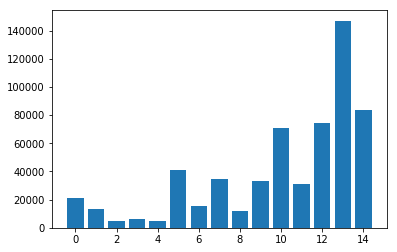

In [98]:
# fav count to rating
plt.bar(df_combo['rating_numerator'], df_combo['favorite_count'])

<Container object of 1948 artists>

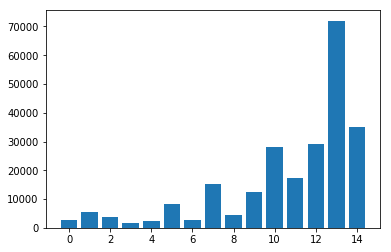

In [99]:
plt.bar(df_combo['rating_numerator'], df_combo['retweet_count'])

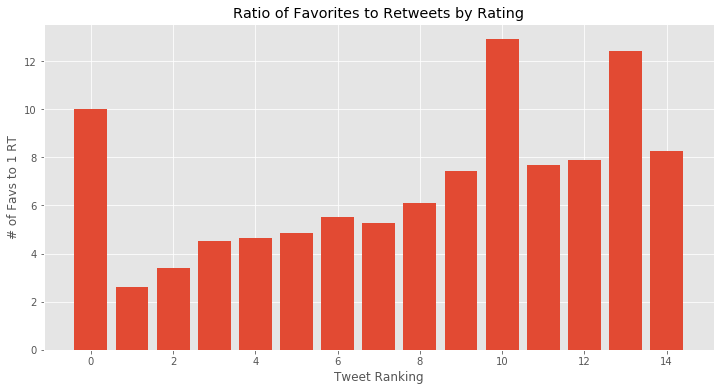

In [145]:
# ratio of favs to retweets by rating
plt.style.use('ggplot')
plt.figure(figsize = (12,6))
plt.bar(df_combo['rating_numerator'], (df_combo['favorite_count']/df_combo['retweet_count']))
plt.title("Ratio of Favorites to Retweets by Rating")
plt.xlabel("Tweet Ranking")
plt.ylabel("# of Favs to 1 RT")
plt.savefig('ratio_rt_rate')
plt.show();

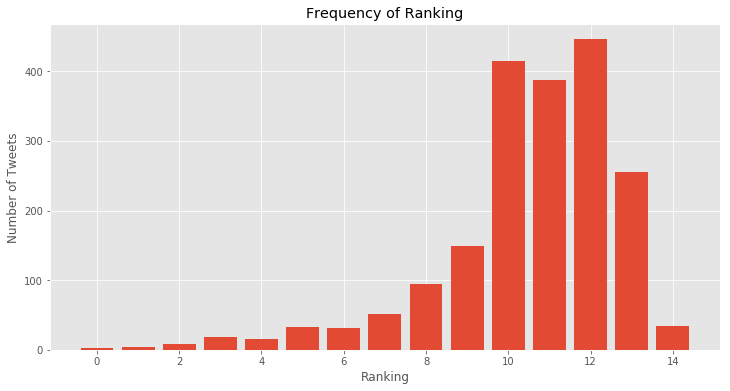

In [143]:
# higher does not mean more ratings
# could there also be a bias of round(10)/even(10/12)/associated number(12/dozen)?
plt.figure(figsize = (12,6))
plt.bar(df_combo['rating_numerator'].value_counts().index,df_combo['rating_numerator'].value_counts())
plt.title("Frequency of Ranking")
plt.xlabel("Ranking")
plt.ylabel("Number of Tweets")
plt.savefig('freq_rank');
plt.show();

(array([   49.,   165.,   265.,   394.,  1075.]),
 array([ 0.1264483 ,  0.30115864,  0.47586898,  0.65057933,  0.82528967,
         1.00000001]),
 <a list of 5 Patch objects>)

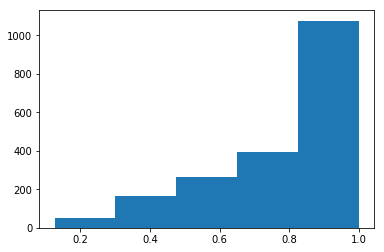

In [111]:
plt.hist(df_combo['p_comb_total'], bins = 5)

In [120]:
df_combo['rating_numerator'].value_counts()[:8]

12    446
10    415
11    388
13    255
9     149
8      95
7      52
14     34
Name: rating_numerator, dtype: int64

In [116]:
df_combo['rating_numerator'].value_counts()[:8].sum()

1834

In [117]:
df_combo.shape

(1948, 23)

In [153]:
df_combo[df_combo['rating_numerator'] == 0][['rating_numerator', 'favorite_count', 'retweet_count']]

,rating_numerator,favorite_count,retweet_count
241,0,21303,2815
818,0,2758,275


In [168]:
df_combo[df_combo['rating_numerator'] == 10].describe()[['rating_numerator','favorite_count','retweet_count', 'display_text_range', 'p1_conf', 'p_comb_total']]

,rating_numerator,favorite_count,retweet_count,display_text_range,p1_conf,p_comb_total
count,415.0,415.000000,415.000000,415.000000,415.000000,415.000000
mean,10.0,3505.761446,1208.725301,112.807229,0.577762,0.776400
std,0.0,5552.513396,2411.563399,26.564141,0.270591,0.210106
min,10.0,92.000000,29.000000,13.000000,0.055379,0.161615
25%,10.0,1004.500000,326.500000,94.000000,0.342817,0.642767
50%,10.0,2244.000000,671.000000,116.000000,0.583427,0.835509
75%,10.0,3995.000000,1311.000000,138.000000,0.816755,0.960629
max,10.0,70669.000000,28157.000000,148.000000,1.000000,1.000000


In [169]:
df_combo[df_combo['rating_numerator'] != 10].describe()[['rating_numerator','favorite_count','retweet_count', 'display_text_range', 'p1_conf', 'p_comb_total']]

,rating_numerator,favorite_count,retweet_count,display_text_range,p1_conf,p_comb_total
count,1533.000000,1533.000000,1533.000000,1533.000000,1533.000000,1533.000000
mean,10.679713,8892.906719,2538.483366,111.273973,0.597855,0.792244
std,2.451586,12267.974705,4350.719653,26.505344,0.272342,0.209488
min,0.000000,67.000000,11.000000,32.000000,0.044333,0.126448
25%,9.000000,1949.000000,578.000000,93.000000,0.367368,0.657820
50%,11.000000,4281.000000,1273.000000,116.000000,0.594701,0.862633
75%,12.000000,11619.000000,2957.000000,137.000000,0.854861,0.973478
max,14.000000,146982.000000,71989.000000,147.000000,0.999984,0.999999


In [174]:
df_combo[df_combo['rating_numerator'] == 12].describe()[['rating_numerator','favorite_count','retweet_count', 'display_text_range', 'p1_conf', 'p_comb_total']]

,rating_numerator,favorite_count,retweet_count,display_text_range,p1_conf,p_comb_total
count,446.0,446.000000,446.000000,446.00000,446.000000,446.000000
mean,12.0,9789.484305,2529.542601,103.35426,0.621775,0.814332
std,0.0,9307.255505,2678.078340,26.56381,0.264947,0.194868
min,12.0,167.000000,43.000000,36.00000,0.059033,0.132860
25%,12.0,3028.000000,951.500000,86.00000,0.385334,0.702095
50%,12.0,7427.500000,1829.500000,107.00000,0.636507,0.880461
75%,12.0,13531.000000,3045.000000,126.00000,0.860548,0.978900
max,12.0,74692.000000,29130.000000,143.00000,0.999953,0.999994


In [173]:
df_combo[df_combo['text'].str.match('This')].describe()

,tweet_id,rating_numerator,rating_denominator,display_text_range,favorite_count,retweet_count,p1_conf,p2_conf,p3_conf,p_comb_total
count,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1.143000e+03,1.143000e+03,1143.000000
mean,7.430506e+17,10.643045,10.000875,110.279965,8373.803150,2345.249344,0.604994,1.321685e-01,5.920089e-02,0.796363
std,6.812776e+16,2.048955,0.029579,24.810674,11196.237131,3671.544916,0.274440,1.006942e-01,5.070733e-02,0.209700
min,6.660293e+17,2.000000,10.000000,35.000000,93.000000,19.000000,0.044333,1.011300e-08,1.740170e-10,0.126448
25%,6.785898e+17,10.000000,10.000000,93.000000,2012.000000,581.500000,0.369468,4.775055e-02,1.464175e-02,0.668575
50%,7.244057e+17,11.000000,10.000000,114.000000,4294.000000,1301.000000,0.605437,1.170030e-01,4.918190e-02,0.871100
75%,7.962686e+17,12.000000,10.000000,134.000000,10829.500000,2799.500000,0.871834,1.953115e-01,9.089320e-02,0.975144
max,8.924206e+17,14.000000,11.000000,144.000000,113485.000000,52594.000000,1.000000,4.880140e-01,2.710420e-01,1.000000


In [175]:
df_combo[df_combo['rating_numerator'] == 10]['display_text_range'].value_counts()

140    47
139    26
138    19
134    14
115    12
137    12
113    11
116     8
136     7
135     7
104     7
144     7
133     7
90      6
130     6
94      6
96      6
102     6
126     6
106     6
111     6
112     6
63      6
78      5
117     5
92      5
93      5
98      5
119     4
83      4
121     4
114     4
122     4
123     4
89      4
110     4
77      4
105     4
143     4
57      3
95      3
72      3
99      3
118     3
59      3
103     3
125     3
107     3
108     3
109     3
64      3
79      2
76      2
80      2
67      2
75      2
74      2
70      2
68      2
66      2
62      2
82      2
61      2
84      2
131     2
124     2
60      2
85      2
129     2
128     2
132     2
91      2
88      2
87      2
55      1
54      1
51      1
48      1
47      1
26      1
56      1
44      1
148     1
65      1
73      1
86      1
97      1
147     1
100     1
101     1
127     1
141     1
145     1
13      1
Name: display_text_range, dtype: int64

In [176]:
df_combo[df_combo['rating_numerator'] != 10]['display_text_range'].value_counts()

140    127
139    110
137     63
138     60
116     42
136     35
115     35
135     28
112     27
134     24
98      23
113     23
127     22
114     22
133     22
120     20
110     20
131     19
108     19
130     19
107     18
100     18
132     17
99      17
118     17
109     16
93      16
106     15
103     15
102     15
129     15
82      15
75      15
111     15
89      14
94      14
91      14
117     14
125     14
123     14
71      13
88      13
77      12
83      12
128     12
143     12
101     12
104     12
121     12
105     11
97      11
64      11
144     11
73      11
84      10
96      10
95      10
68      10
79      10
80      10
119      9
124      9
86       9
87       9
76       9
126      9
92       9
122      9
72       8
70       8
90       8
78       7
54       7
66       7
67       7
53       7
85       7
81       7
74       6
69       5
60       5
55       5
59       5
61       5
62       5
65       5
63       4
52       4
46       4
51       4
41       4

Could the ranking system and way to achieve favorites and retweets be artbitrary?